In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import colorcet as cc
import plotly.express as px
from wordcloud import WordCloud # pip install wordcloud

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
%matplotlib inline

config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'newplot',
    'height': 500,
    'width': 900,
    'scale': 10 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

In [2]:
df=pd.read_pickle('./dataset_/dataset_cleaned_popularity.pkl')
df.drop(columns=['index', 'level_0'], inplace=True)  # Comes from pickeling the file
df.reset_index(drop=True, inplace=True)

## Genre & Subgenre Analysis
### Subgenre Distributions
Previously, we have got findings that the most frequent genre and subgenre in Spotify Top 200 Playlist 2017-2020 dataset is pop and dance pop. There are 20 genres and 1119 subgenres in total. Complementary to this, we tried to take a look of how many subgenres in a genre in our dataset. At first, we thought that pop has the highest number of subgenres, but it turns out that **else** genre is the highest one, as you can see in the chart below.

In [4]:
df_genre_subgenre = df.groupby('genre')['sub_genre'].nunique().reset_index(name="total subgenre").sort_values('total subgenre', ascending=False)
df_genre_subgenre.style.hide_index()

genre,total subgenre
else,355
pop,210
rap,92
indie,91
hip hop,70
rock,69
dance/electronic,46
r&b/soul,35
house,33
latin,28


In [14]:
fig = px.bar(df_genre_subgenre, x='total subgenre', y='genre',
             title='Total Subgenre per Genre',
             color='genre',
             hover_data=['total subgenre'], 
             orientation='h',
             height=500,
             width=900,
             labels={
                "total subgenre": "Total Subgenre",
                "genre": "Genre"
                },
             color_discrete_sequence=['teal'])
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update(layout_showlegend=False)
fig.show(config=config)

For that reason, we decided to take a look further into else and pop genre in the next section and also pick jazz as one of the genre that has a very few subgenres.

#### Else Genre
In the previous report, we stated that `else` subgenres are mostly "outliers" or unfamiliar in comparison with other subgenres. Hence, we find it interesting to see what are the most popular and frequent subgenres in else category, in hope we wouldn't find any common subgenre there.

In [6]:
# Else
df_else_count = df[df['genre'] == 'else'].groupby('sub_genre')['sub_genre'].count().reset_index(name='count').sort_values('count', ascending=False)
fig = px.bar(df_else_count[:20], x='sub_genre', y='count',
             title='Top 20 Most Frequent Else Subgenre',
             color='sub_genre',
             height=500,
             width=900,
             labels={
                "sub_genre": "Subgenre",
                "count": "Song Count"
                },
             color_discrete_sequence=px.colors.sequential.Greens)
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update(layout_showlegend=False)
fig.show(config=config)

In [9]:
# Else
df_else_sum = df[df['genre'] == 'else'].groupby('sub_genre')['popularity'].sum().reset_index(name='popularity')
df_else_sum['popularity'] = (df_else_sum['popularity'] - df_else_sum['popularity'].min()) / (df_else_sum['popularity'].max() - df_else_sum['popularity'].min())
df_else_sum = df_else_sum.sort_values('popularity', ascending=False)[:20]
fig = px.bar(df_else_sum, x='sub_genre', y='popularity',
             title='Top 20 Most Popular Else Subgenre',
             color='sub_genre',
             height=500,
             width=900,
             labels={
                "sub_genre": "Subgenre",
                "popularity": "Popularity"
                },
             color_discrete_sequence=px.colors.sequential.Greens)
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update(layout_showlegend=False)
fig.show(config=config)

Unfortunately, we see the first subgenre is **hollywood**, which is the most popular and frequent there. This rises a question for us, isn't hollywood supposed to be put under some popular genre, like pop? Therefore, we tried to deep dive into this hollywood subgenre a little bit to see what kind of "hollywood" songs in our dataset.

In [11]:
df[df['sub_genre'] == 'hollywood'][['country', 'title', 'artist', 'sub_genre', 'album']].sample(10)

,country,title,artist,sub_genre,album
143318,Taiwan,alibi,Bradley Cooper,hollywood,A Star Is Born Soundtrack
161062,Taiwan,riff off,The Bellas - Evermoist - Saddle Up - Young Spa...,hollywood,Pitch Perfect 3 (Original Motion Picture Sound...
73361,Taiwan,city of stars - from la la land soundtrack,Ryan Gosling - Emma Stone,hollywood,City Of Stars (From La La Land Soundtrack)
92651,Malaysia,a lovely night - from la la land soundtrack,Ryan Gosling - Emma Stone,hollywood,La La Land (Original Motion Picture Soundtrack)
25612,Ireland,from now on,Hugh Jackman - The Greatest Showman Ensemble,hollywood,The Greatest Showman (Original Motion Picture ...
46458,Switzerland,baby its cold outside,Idina Menzel - Michael Bublé,hollywood,Holiday Wishes
88599,Singapore,lost in the woods,Jonathan Groff,hollywood,Frozen 2 (Original Motion Picture Soundtrack/D...
73356,Philippines,city of stars - from la la land soundtrack,Ryan Gosling - Emma Stone,hollywood,City Of Stars (From La La Land Soundtrack)
148374,Taiwan,way back into love,Hugh Grant - Haley Bennett,hollywood,Music And Lyrics - Music From and Inspired By ...
28829,Spain,someone in the crowd - from la la land soundtrack,Emma Stone - Callie Hernandez - Sonoya Mizuno ...,hollywood,La La Land (Original Motion Picture Soundtrack)


In [19]:
hollywood_records = len(df[df['sub_genre'] == 'hollywood'])

By looking at the samples above, we can see that most of them are OST movie songs. 
So, for quick validation, we pick two samples and cross check the genre in google:

1. alibi - A Star is Born Soundtrack is country. 
2. city of stars - La La Land Soundtrack is jazz.

Considering that these two songs are not supposed to be put under else genre and will probably affect our future work, we decided to deep into hollywood subgenre further next week.

However, the rest of subgenres are very uncommon and we are confident enough to say that the other else category songs are well classified. We also tried to visualize the whole else subgenres in a wordcloud to see what other categories are there. The plot shows us that there are also broadway and disney subgenre and we doubt that these two are also belong to the else genre.

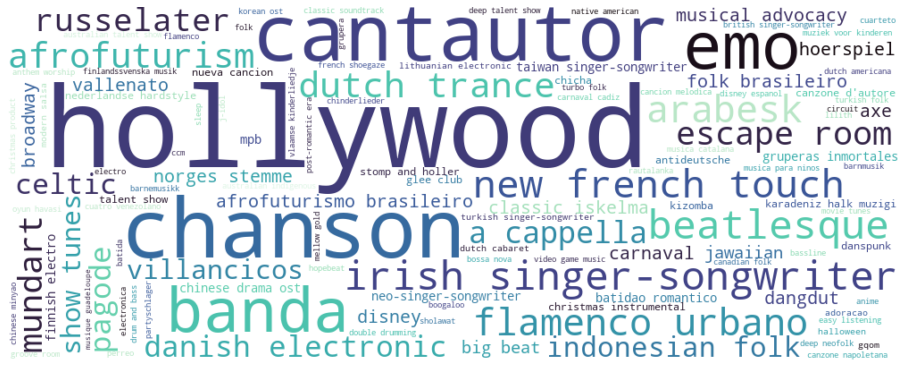

In [13]:
# method 1: convert to dict 
data = dict(zip(df_else_count['sub_genre'].tolist(), df_else_count['count'].tolist()))

# method 2: convert to dict
data = df_else_count.set_index('sub_genre').to_dict()['count']

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=1000, height=400, colormap="mako",
                        min_font_size=8, max_font_size=125).generate_from_frequencies(data)

# Display the generated image:
plt.figure( figsize=(16,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Pop Genre
Earlier we said that the most frequent subgenre in our dataset is dance pop. In this section, we want to see whether dance pop is also the most popular genre in pop besides it being the most frequent one.

In [20]:
# Pop
df_pop_sum = df[df['genre'] == 'pop'].groupby('sub_genre')['popularity'].sum().reset_index(name='popularity').sort_values('popularity', ascending=False)[:20]
df_pop_sum['popularity'] = (df_pop_sum['popularity'] - df_pop_sum['popularity'].min()) / (df_pop_sum['popularity'].max() - df_pop_sum['popularity'].min())
fig = px.bar(df_pop_sum, x='sub_genre', y='popularity',
             title='Top 20 Most Popular Pop Subgenre',
             color='sub_genre',
             height=500,
             width=900,
             labels={
                "sub_genre": "Subgenre",
                "popularity": "Popularity"
                },
             color_discrete_sequence=px.colors.sequential.Darkmint)
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update(layout_showlegend=False)
fig.show(config=config)

In [21]:
# Pop
df_pop_count = df[df['genre'] == 'pop'].groupby('sub_genre')['sub_genre'].count().reset_index(name='count').sort_values('count', ascending=False)[:20]
fig = px.bar(df_pop_count, x='sub_genre', y='count',
             title='Top 20 Most Frequent Pop Subgenre',
             color='sub_genre',
             height=500,
             width=900,
             labels={
                "sub_genre": "Subgenre",
                "count": "Song Count"
                },
             color_discrete_sequence=px.colors.sequential.Darkmint)
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update(layout_showlegend=False)
fig.show(config=config)

It can be seen that dance pop is also the most popular one here. Therefore, we can assume that there are many dance pop songs that are stayed longer in high positions so that their popularity score is very high. This leads us to our possibly next exploration like which genre is usually stayed in the top 5 position of the Spotify playlist.

Similarly, both popular and frequent charts also show the same subgenre in the second position, which is pop itself. But, the rest are mostly some specific country subgenres and the distributions are almost the same for each subgenre.

#### Jazz Genre
Last genre that we'll talk about is jazz. It only has 7 subgenres so we think that it's easier to read the distributions of subgenre from a pie chart as below.

In [22]:
# Jazz
df_jazz_sum = df[df['genre'] == 'jazz'].groupby('sub_genre')['popularity'].sum().reset_index(name='sum popularity')
fig = px.pie(df_jazz_sum, values='sum popularity', names='sub_genre',
             title='Distributions of Jazz Subgenre by Popularity',
             hover_data=['sum popularity'], labels={'sub_genre':'Subgenre'},
             height=500,
             width=800,
             color_discrete_sequence=px.colors.sequential.Greens)
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend={
        'y':0.9,
        'x':1.3,
        'xanchor': 'right',
        'yanchor': 'top'})
fig.show(config=config)

In [23]:
# Jazz
df_jazz_count = df[df['genre'] == 'jazz'].groupby('sub_genre')['sub_genre'].count().reset_index(name='count')
fig = px.pie(df_jazz_count, values='count', names='sub_genre',
             title='Distributions of Jazz Subgenre by Song Count',
             hover_data=['count'], labels={'sub_genre':'Subgenre'},
             height=500,
             width=800,
             color_discrete_sequence=px.colors.sequential.Greens)
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend={
        'y':0.9,
        'x':1.2,
        'xanchor': 'right',
        'yanchor': 'top'})
fig.show(config=config)

Both charts surprisingly have the same pattern as pop genre that the same subgenre comes in both first and second position either calculated by popularity or song frequency. We can also see that indonesian jazz is very popular, even the sum of popularity score is more than 70% of the whole score of jazz subgenres.

### Genre Trends per Country
Here we will explain how Spotify 200 Top Playlist 2017-2020 genre trends in some countries. We take Global, USA and Germany as our samples.

In [25]:
df_genre_country = df[(df['country'] == 'Global') | (df['country'] == 'USA') | (df['country'] == 'Germany')].groupby(['country', 'genre'])['genre'].count().reset_index(name='count')
df_genre_country.sort_values(by=['count'], ascending=False, inplace=True)
df_genre_country.head(5)

,country,genre,count
5,Germany,hip hop,3006
41,USA,hip hop,1972
48,USA,pop,1800
30,Global,pop,1706
11,Germany,pop,1507


In [27]:
colors = {'Germany': '#2c728e',
          'USA': '#28ae80',
          'Global': '#addc30'}
fig = px.bar(df_genre_country, x="genre", y="count",
             color='country', barmode='group',
             title='Genre Trends in Germany, USA and Global',
             height=500,
             color_discrete_map=colors,
             labels={
                "genre": "Genre",
                "count": "Song Count"
                })
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show(config=config)

As you can see in the chart above, all the three countries have the same genre trends in general. Hip hop, pop and rap come in the top 3 position for all of them. Meanwhile, for the rest genres, there are only a few (under 500) that are in the Top 200 Spotify Playlist. By looking at this, for now it makes sense to assume that hip hop, pop and rap are also popular within our dataset since we only have Top 200 Playlist songs, but we will definitely prove this in the upcoming week.

In the same way, we will also discuss how is the subgenre trends in Global, USA and Germany. Before going into the next section, since we visualized all the subgenres using wordcloud, we just want to emphasize here that the bigger font size means the higher number of songs they have.

#### Global

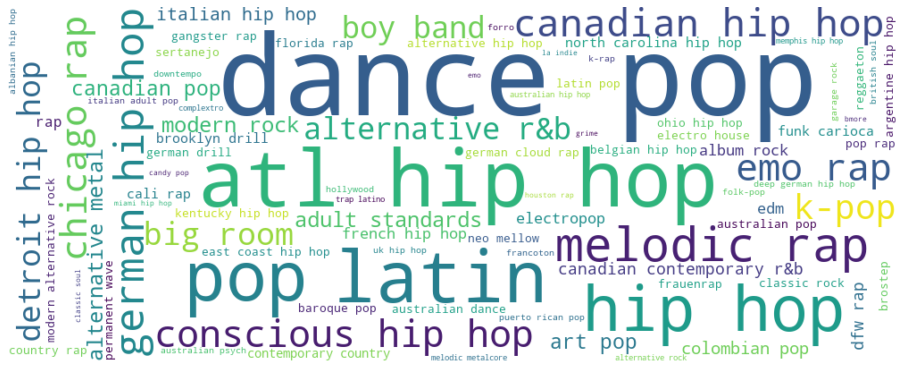

In [29]:
df_subgenre_gl = df[df['country'] == 'Global'].groupby(['sub_genre'])['sub_genre'].count().reset_index(name='count').sort_values('count', ascending=False)

# method 1: convert to dict 
data = dict(zip(df_subgenre_gl['sub_genre'].tolist(), df_subgenre_gl['count'].tolist()))

# method 2: convert to dict
data = df_subgenre_gl.set_index('sub_genre').to_dict()['count']

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=1000, height=400, colormap="viridis",
                        min_font_size=8, max_font_size=125).generate_from_frequencies(data)

# Display the generated image:
plt.figure( figsize=(16,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### USA

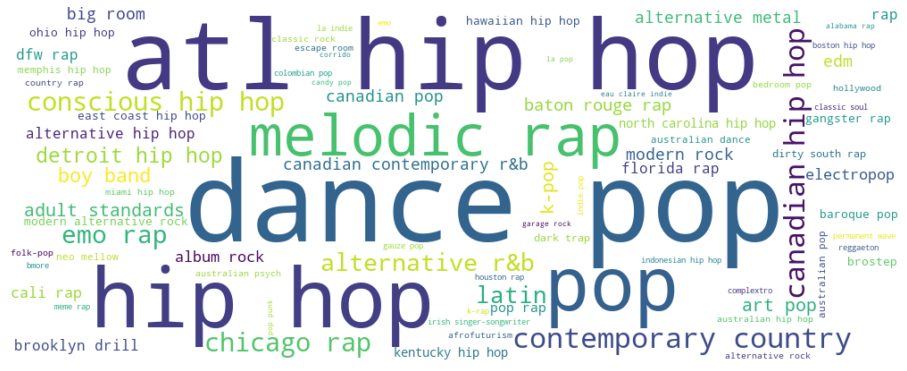

In [30]:
df_subgenre_us = df[df['country'] == 'USA'].groupby(['sub_genre'])['sub_genre'].count().reset_index(name='count').sort_values('count', ascending=False)

# method 1: convert to dict 
data = dict(zip(df_subgenre_us['sub_genre'].tolist(), df_subgenre_us['count'].tolist()))

# method 2: convert to dict
data = df_subgenre_us.set_index('sub_genre').to_dict()['count']

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=1000, height=400, colormap="viridis",
                        min_font_size=8, max_font_size=125).generate_from_frequencies(data)

# Display the generated image:
plt.figure( figsize=(16,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Germany

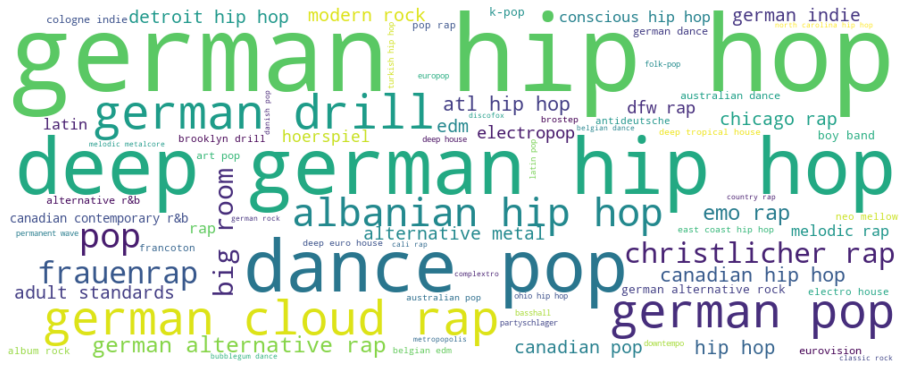

In [31]:
df_subgenre_de = df[df['country'] == 'Germany'].groupby(['sub_genre'])['sub_genre'].count().reset_index(name='count').sort_values('count', ascending=False)

# method 1: convert to dict 
data = dict(zip(df_subgenre_de['sub_genre'].tolist(), df_subgenre_de['count'].tolist()))

# method 2: convert to dict
data = df_subgenre_de.set_index('sub_genre').to_dict()['count']

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=1000, height=400, colormap="viridis",
                        min_font_size=8, max_font_size=125).generate_from_frequencies(data)

# Display the generated image:
plt.figure( figsize=(16,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Observations
Both Global and USA don't really have significant difference in their genre trends. We can clearly see that dance pop, hip hop and atlanta hip hop comes as the biggest font there, which means there are many songs under that subgenre in Global and USA. On the other hand, for Germany, there are many subgenres appear with prefix "german" which we can assume that their local songs are dominant in the Top 200 Spotify Playlist, especially german hip hop.

It would also be interesting to see how the subgenre trends in terms of popularity in these countries which we'll save it for the upcoming week too.

### Conclusions
We found some issues that possibly affect our future work in the else genre songs that are supposed to be put in other genre and we will definitely take a look further into this. For else, pop and jazz subgenre distributions in either popularity or frequency, they have the same pattern in general for the top 3 positions. Another essential point is we couldn't compare how popular genre and subgenre in our country samples above for now, but the Global, USA and Germany have the same top frequent genre. Meanwhile in subgenre, Germany has their own top frequent local songs.

### Next Steps
1. Deep dive into hollywood, broadway and disney subgenre (or probably any other "common" subgenre under else) to decide whether we should use this data for our future work
2. Explore genre and subgenre by popularity score per country
3. Find patterns of song characteristics (danceability, energy, valence, etc.) in some popular genres